In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(zoom_range = 0.3,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()



In [32]:
train_gen = train_datagen.flow_from_directory(
                            directory = "/kaggle/input/kermany2018/OCT2017 /train/", 
                            target_size = (160, 160), 
                            batch_size = 16, 
                            class_mode = 'categorical', 
                            shuffle=True)



Found 83484 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


In [4]:
val_gen=val_datagen.flow_from_directory(
                            directory = "/kaggle/input/kermany2018/OCT2017 /val/", 
                            target_size = (160, 160), 
                            batch_size = 16, 
                            class_mode = 'categorical', 
                            shuffle=True)

Found 32 images belonging to 4 classes.


In [78]:

test_gen = test_datagen.flow_from_directory(
                            directory = "/kaggle/input/kermany2018/OCT2017 /test/", 
                            target_size = (160, 160), 
                            batch_size = 16, 
                            class_mode = 'categorical', 
                            shuffle=False
                            )

Found 968 images belonging to 4 classes.


In [64]:
test_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [5]:
val_gen.class_indices

{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}

In [6]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=2, mode='max')
cp = ModelCheckpoint(filepath='./eff_model.{epoch:02d}-{val_loss:.2f}.keras')


In [7]:
from tensorflow.keras.applications import EfficientNetB7

In [8]:
transfer_model=EfficientNetB7(weights='imagenet',include_top=False, input_shape=(160,160,3))

258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
transfer_model.summary()


Model: "efficientnetb7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 160, 160,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 160, 160,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 160, 160,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 161, 161,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 80, 80,    │      1,728 │ stem_conv_pad[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 80, 80,    │        256 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 80, 80,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 80, 80,    │        576 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 80, 80,    │        256 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 80, 80,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 64)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 64)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 16)  │      1,040 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 64)  │      1,088 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 80, 80,    │          0 │ block1a_activati… │
│ (Multiply)          │ 64)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 80, 80,    │      2,048 │ block1a_se_excit

 Total params: 64,097,687 (244.51 MB)

 Trainable params: 63,786,960 (243.33 MB)

 Non-trainable params: 310,727 (1.19 MB)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


model = Sequential()
model.add(transfer_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4,activation = 'softmax'))
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics= ['accuracy'])

In [11]:
import tensorflow.keras.backend as K

In [12]:
history_eff = model.fit(
           train_gen,
           epochs=9,        
           validation_data=val_gen, 
           callbacks=[lr,cp],
           verbose=1)

Epoch 1/9


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1730024003.936516     119 service.cc:145] XLA service 0x78e58c0036e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730024003.936589     119 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730024003.936594     119 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1730024258.261608     119 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5218/5218 ━━━━━━━━━━━━━━━━━━━━ 2242s 357ms/step - accuracy: 0.8806 - loss: 0.3648 - val_accuracy: 0.9688 - val_loss: 0.0862 - learning_rate: 0.0010
Epoch 2/9
5218/5218 ━━━━━━━━━━━━━━━━━━━━ 1443s 265ms/step - accuracy: 0.9369 - loss: 0.1967 - val_accuracy: 0.9688 - val_loss: 0.0561 - learning_rate: 0.0010
Epoch 3/9
5218/5218 ━━━━━━━━━━━━━━━━━━━━ 1383s 265ms/step - accuracy: 0.9458 - loss: 0.1693 - val_accuracy: 1.0000 - val_loss: 0.0098 - learning_rate: 0.0010
Epoch 4/9
5218/5218 ━━━━━━━━━━━━━━━━━━━━ 1383s 265ms/step - accuracy: 0.9483 - loss: 0.1554 - val_accuracy: 1.0000 - val_loss: 0.0179 - learning_rate: 0.0010
Epoch 5/9
5218/5218 ━━━━━━━━━━━━━━━━━━━━ 1383s 265ms/step - accuracy: 0.9536 - loss: 0.1403 - val_accuracy: 1.0000 - val_loss: 0.0379 - learning_rate: 0.0010
Epoch 6/9
5218/5218 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.9545 - loss: 0.1351
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
5218/5218 ━━━━━━━━━━━━━━━━━━━━ 1383s 265ms/step - accur

In [13]:
import tensorflow as tf

# TensorFlow GPU kullanımı kontrolü
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  2


In [ ]:
import os

# NVIDIA SMI komutunu çalıştırarak GPU kullanımını kontrol etme
os.system('nvidia-smi')
/kaggle/working/eff_model.04-0.03.keras

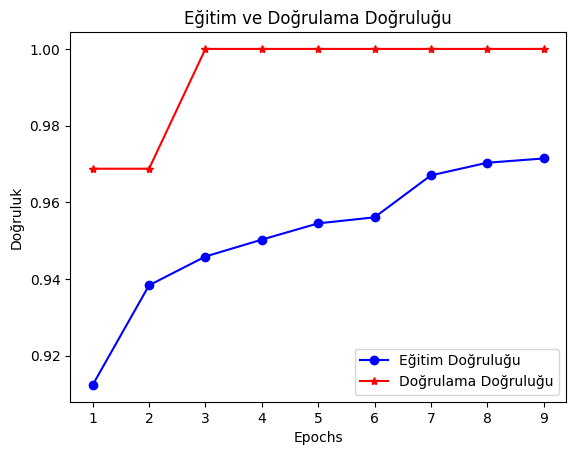

In [17]:
import matplotlib.pyplot as plt

# Model eğitimi sonrasında history nesnesi kullanılarak metrikler elde ediliyor

# Eğitim ve doğrulama doğruluğu değerlerini elde etme
accuracy = history_eff.history['accuracy']
val_accuracy = history_eff.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Doğruluk ve doğrulama doğruluğu grafiği
plt.plot(epochs, accuracy, 'bo-', label='Eğitim Doğruluğu')
plt.plot(epochs, val_accuracy, 'r*-', label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()


The reason why the validation set suddenly came out as 1.0 is because the validation set is small.

In [79]:
y_pred=model.predict(test_gen)

 2/61 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step 

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step


In [86]:
y_true=test_gen.classes

y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [87]:
y_pred.shape

(968, 4)

In [88]:
predicted_classes= np.argmax(y_pred, axis=1)


In [89]:
predicted_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [90]:
from sklearn.metrics import classification_report,accuracy_score

In [91]:
model.evaluate(test_gen)

61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9868 - loss: 0.0395


[0.051365356892347336, 0.9824380278587341]

In [92]:
accuracy = accuracy_score(y_true,predicted_classes)
print("Doğruluk:", accuracy)

Doğruluk: 0.9824380165289256


In [95]:
print(classification_report(y_true,predicted_classes))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       242
           1       1.00      0.96      0.98       242
           2       1.00      0.97      0.98       242
           3       1.00      1.00      1.00       242

    accuracy                           0.98       968
   macro avg       0.98      0.98      0.98       968
weighted avg       0.98      0.98      0.98       968



In [97]:
image,label=next(test_gen)

In [126]:
images, true_classes = next(test_gen)  


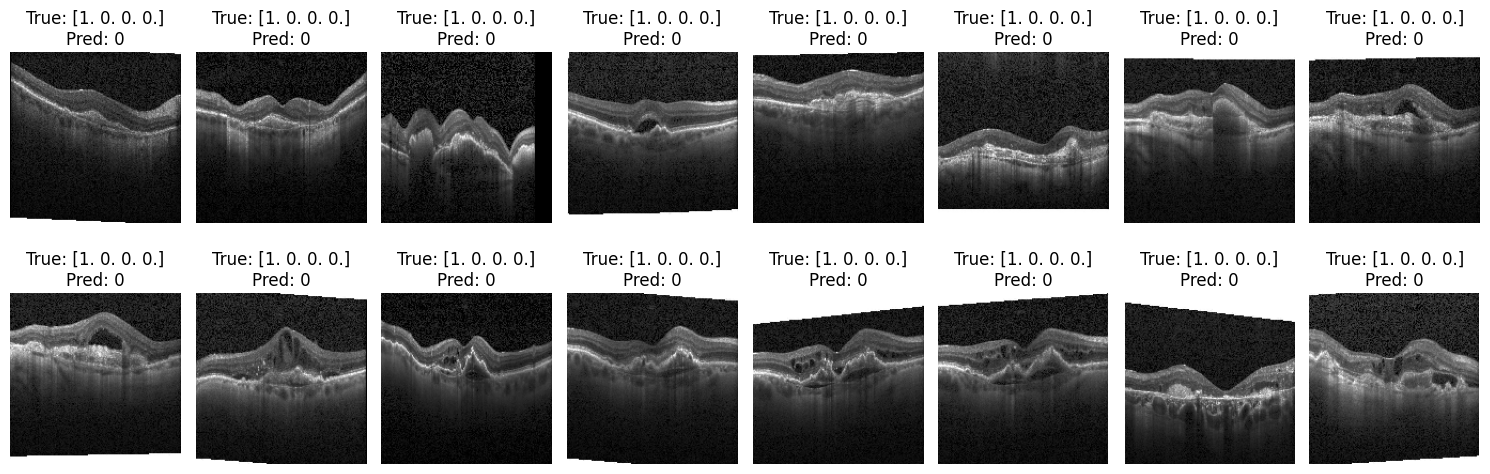

In [127]:
plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(4, 8, i + 1)  
    plt.imshow(images[i].astype("uint8"))
    plt.axis('off') 

    plt.title(f"True: {true_classes[i]}\nPred: {predicted_classes[i]}")
    
plt.tight_layout()  
plt.show()